In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize
from iminuit import Minuit

In [66]:
filename = "MCRealTimeCorrelationsDiffpoint05.csv"

tdiff = 0.05

if filename[:2] == 'HD':
    title = 'High Density Phase'
    alpha = 0.75
    beta = 0.25
elif filename[:2] == 'LD':
    title = 'Low Density Phase'
    alpha = 0.25
    beta = 0.75
else:
    title = 'Maximal Current Phase'
    alpha = 0.75
    beta = 0.75

In [67]:
df = pd.read_csv(filename)
df.head()

,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,...,0.80,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
av_tau_u = np.array(df.mean(axis=0))
av_tau_0 = av_tau_u[0]
new_df = df.mul(df.iloc[:, 0], axis=0)
av_tau_product = np.array(new_df.mean(axis=0))

corr_func = av_tau_product - av_tau_0 * av_tau_u

In [69]:
def model_func(t, A, k):
    return A * t**(-k)

def linear_func(t, A, k):
    if A <= 0:
        A = 1e-9
    return np.log(A) - k*np.log(t)

def LSQ1(A, k):
    return np.sum((corr_func - model_func(t, A, k)) ** 2)

def LSQ2(A, k):
    return np.sum((np.log(corr_func) - linear_func(t, A, k)) ** 2)

In [70]:
t = np.arange(0, len(corr_func)*tdiff, tdiff)
t = t[1:]
corr_func = corr_func[1:]

In [71]:
fit1 = Minuit(LSQ1, A=0.1, k=0.4)
fit1.errordef = 1.
fit1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 0.0313                     │              Nfcn = 30               │
│ EDM = 1.55e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.08    │   0.10    │            │            │         │         │       │
│ 1 │ k    │    0.5    │    0.7    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       A       k │
├───┼─────────────────┤
│ A │ 0.00947 -0.0199 │
│ k │ -0.0199   0.463 │
└───┴─────────────────┘

In [72]:
# get parameter best estimates
A_fit1 = fit1.values["A"]
k_fit1 = fit1.values["k"]

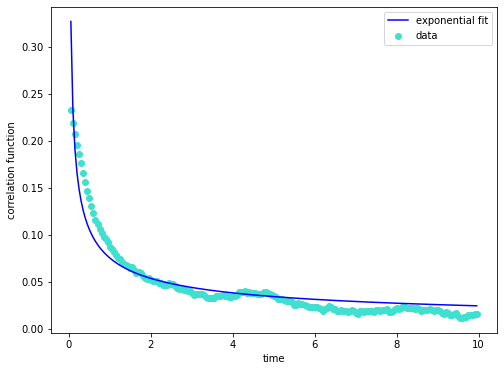

In [73]:
plt.figure(figsize=(8,6))
plt.scatter(t, corr_func, color='turquoise', label='data')
plt.plot(t, model_func(t, A_fit1, k_fit1), color='blue', label='exponential fit')
plt.ylabel('correlation function')
plt.xlabel('time')
plt.legend(loc='best')
plt.savefig('MCCorrelationsGraph1')
plt.show()

In [74]:
fit2 = Minuit(LSQ2, A=0.1, k=0.4)
fit2.errordef = 1.
fit2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.043                      │              Nfcn = 59               │
│ EDM = 3.26e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ A    │   0.08    │   0.01    │            │            │         │         │       │
│ 1 │ k    │   0.66    │   0.07    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        A        k │
├───┼───────────────────┤
│ A │ 9.33e-05 0.000582 │
│ k │ 0.000582  0.00554 │
└───┴───────────────────┘

In [75]:
A_fit2 = fit2.values["A"]
k_fit2 = fit2.values["k"]

In [81]:
fit2.values["A"]

0.07994178527902601

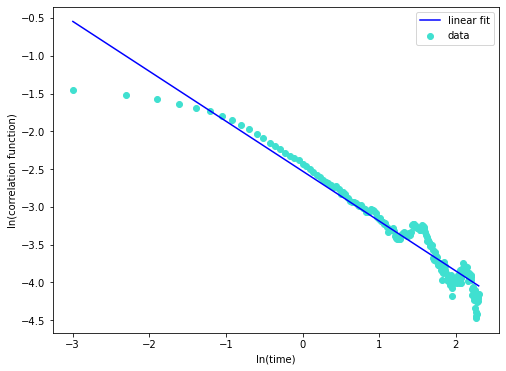

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(np.log(t), np.log(corr_func), color='turquoise', label='data')
plt.plot(np.log(t), linear_func(t, A_fit2, k_fit2), color='blue', label='linear fit')
plt.ylabel('ln(correlation function)')
plt.xlabel('ln(time)')
plt.legend(loc='best')
plt.savefig('MCCorrelationsGraph2')
plt.show()